In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyecharts import Pie
import missingno as msno

## 导入数据

In [2]:
data = pd.read_excel('data_cn.xlsx')
data.loc[data.label ==2,'label'] = 0
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [3]:
data.describe()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [4]:
data.shape

(1000, 21)

In [5]:
data.dtypes

Status_of_existing_checking_account                         object
Duration_in_month                                            int64
Credit_history                                              object
Purpose                                                     object
Credit_amount                                                int64
Savings_account                                             object
Present_employment_since                                    object
Installment_rate_in_percentage_of_disposable_income          int64
Personal_status_and_sex                                     object
guarantors                                                  object
Present_residence_since                                      int64
Property                                                    object
Age                                                          int64
Other_installment_plans                                     object
Housing                                                     ob

In [6]:
attr = ["正常", "违约"]
pie = Pie("贷款状态占比")
pie.add("", attr, [int(i) for i in pd.value_counts(data["label"])] ,is_label_show=True)
pie

In [7]:
objectColumns = data.select_dtypes(include=["object"]).columns
var = data[objectColumns].columns
for v in var:
    print('\nFrequency count for variable {0}'.format(v))
    print(data[v].value_counts())
data[objectColumns].shape


Frequency count for variable Status_of_existing_checking_account
A14    394
A11    274
A12    269
A13     63
Name: Status_of_existing_checking_account, dtype: int64

Frequency count for variable Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit_history, dtype: int64

Frequency count for variable Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: Purpose, dtype: int64

Frequency count for variable Savings_account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings_account, dtype: int64

Frequency count for variable Present_employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: Present_employment_since, dtype: int64

Frequency count for variable Personal_status_and_sex
A93    548
A92    310
A94     92
A91     50
Name: Personal_status_and_sex, dtype: int64

Frequency count for variable guarantors
A101    907
A103     52
A102     41
Na

(1000, 13)

## 数据转换为数值

In [8]:
maping = {'Status_of_existing_checking_account':
{'A11': 100 , 
'A12': 200, 
'A13': 400 , 
'A14': 0, },

'Credit_history':
{'A30': 4, 
'A31': 3, 
'A32': 2, 
'A33': 1, 
'A34': 0, },

'Savings_account':
{'A61': 100, 
'A62': 500, 
'A63': 1000, 
'A64': 2000, 
'A65': 1, },

'Present_employment_since':
{'A71': 0, 
'A72': 1, 
'A73': 4, 
'A74': 7, 
'A75': 10, },

'guarantors':
{'A101': 0, 
'A102': 1, 
'A103': 2, },

'Property':
{'A121': 4, 
'A122': 3, 
'A123': 2, 
'A124': 1, },

'Housing':
{'A151': 1, 
'A152': 2, 
'A153': 0, },

'Job':
{'A171': 1, 
'A172': 2, 
'A173': 3, 
'A174': 4, },

'Telephone':
{'A191': 0, 
'A192': 1, },
          
'foreign_worker':
{'A201': 1,
'A202': 0}}

In [9]:
data_tranfer = data.copy()
for column, map_value in maping.items():
    data_tranfer[column] = data[column].map(map_value)
data_tranfer.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,A43,1169,1,10,4,A93,0,...,4,67,A143,2,2,3,1,1,1,1
1,200,48,2,A43,5951,100,4,2,A92,0,...,4,22,A143,2,1,3,1,0,1,0
2,0,12,0,A46,2096,100,7,2,A93,0,...,4,49,A143,2,1,2,2,0,1,1
3,100,42,2,A42,7882,100,7,2,A93,2,...,3,45,A143,0,1,3,2,0,1,1
4,100,24,1,A40,4870,100,4,3,A93,0,...,1,53,A143,0,2,3,2,0,1,0


In [10]:
#for column in data.columns:
#    data2[column] = pd.factorize(data[column])[0]
#data2.head()

In [11]:
drop_cols = ['Other_installment_plans', 'Personal_status_and_sex', 'Purpose']
data_drop = data_tranfer.drop(labels=drop_cols, axis=1)
data_drop.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,guarantors,Present_residence_since,Property,Age,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,1169,1,10,4,0,4,4,67,2,2,3,1,1,1,1
1,200,48,2,5951,100,4,2,0,2,4,22,2,1,3,1,0,1,0
2,0,12,0,2096,100,7,2,0,3,4,49,2,1,2,2,0,1,1
3,100,42,2,7882,100,7,2,2,4,3,45,0,1,3,2,0,1,1
4,100,24,1,4870,100,4,3,0,4,1,53,0,2,3,2,0,1,0


In [12]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
Status_of_existing_checking_account                         1000 non-null int64
Duration_in_month                                           1000 non-null int64
Credit_history                                              1000 non-null int64
Credit_amount                                               1000 non-null int64
Savings_account                                             1000 non-null int64
Present_employment_since                                    1000 non-null int64
Installment_rate_in_percentage_of_disposable_income         1000 non-null int64
guarantors                                                  1000 non-null int64
Present_residence_since                                     1000 non-null int64
Property                                                    1000 non-null int64
Age                                                         1000 non-null int64
Housing       

## 增加特征

In [13]:
data_add = data_drop.copy()
data_add['saving_by_credit'] = data_drop['Savings_account'] / data_drop['Credit_amount']
data_add['each_loan'] =   data_drop['Credit_amount'] / (data_drop['guarantors']+1)
data_add.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,guarantors,Present_residence_since,Property,Age,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label,saving_by_credit,each_loan
0,100,6,0,1169,1,10,4,0,4,4,67,2,2,3,1,1,1,1,0.000855,1169.000000
1,200,48,2,5951,100,4,2,0,2,4,22,2,1,3,1,0,1,0,0.016804,5951.000000
2,0,12,0,2096,100,7,2,0,3,4,49,2,1,2,2,0,1,1,0.047710,2096.000000
3,100,42,2,7882,100,7,2,2,4,3,45,0,1,3,2,0,1,1,0.012687,2627.333333
4,100,24,1,4870,100,4,3,0,4,1,53,0,2,3,2,0,1,0,0.020534,4870.000000


## 数据划分

In [14]:
from sklearn.model_selection import train_test_split

X = data_add.drop('label', axis=1).astype(np.float64).values
y = data_add['label'].values

### z-score 规范化

In [15]:
from sklearn.preprocessing import scale
X_scale = scale(X)

col = data_add.columns.drop('label') #剔除目标变量
data_scale = data_add.copy()
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
data_scale[col] =sc.fit_transform(data_scale[col]) #对数据进行标准化
data_scale.head() #查看经标准化后的数据

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,guarantors,Present_residence_since,Property,Age,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label,saving_by_credit,each_loan
0,-0.057803,-1.236478,-1.344014,-0.745131,-0.584510,1.387862,0.918477,-0.303686,1.046987,1.293723,2.766456,0.585603,1.027079,0.146949,-0.428290,1.214598,0.196014,1,-0.365994,-0.696278
1,0.845372,2.248194,0.503428,0.949817,-0.370176,-0.374876,-0.870183,-0.303686,-0.765977,1.293723,-1.191404,0.585603,-0.704926,0.146949,-0.428290,-0.823318,0.196014,0,-0.331161,1.031663
2,-0.960978,-0.738668,-1.344014,-0.416562,-0.370176,0.506493,-0.870183,-0.303686,0.140505,1.293723,1.183312,0.585603,-0.704926,-1.383771,2.334869,-0.823318,0.196014,1,-0.263660,-0.361313
3,-0.057803,1.750384,0.503428,1.634247,-0.370176,0.506493,-0.870183,3.885083,1.046987,0.341055,0.831502,-2.379476,-0.704926,0.146949,2.334869,-0.823318,0.196014,1,-0.340153,-0.169320
4,-0.057803,0.256953,-0.420293,0.566664,-0.370176,-0.374876,0.024147,-0.303686,1.046987,-1.564281,1.535122,-2.379476,1.027079,0.146949,2.334869,-0.823318,0.196014,0,-0.323015,0.641052


In [16]:
x_val = data_scale.drop('label', axis=1)
y_val = data_scale['label']

## 递归特征消除 (Recursive Feature Elimination)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 10) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

[ True  True  True  True  True  True  True False False False False  True
 False False False  True  True False False]
[ 1  1  1  1  1  1  1  4  8  6  5  1  2 10  9  1  1  7  3]


In [18]:
col_filter = x_val.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Credit_amount', 'Savings_account',
       'Present_employment_since',
       'Installment_rate_in_percentage_of_disposable_income', 'Housing',
       'Telephone', 'foreign_worker'],
      dtype='object')

## 相关性分析

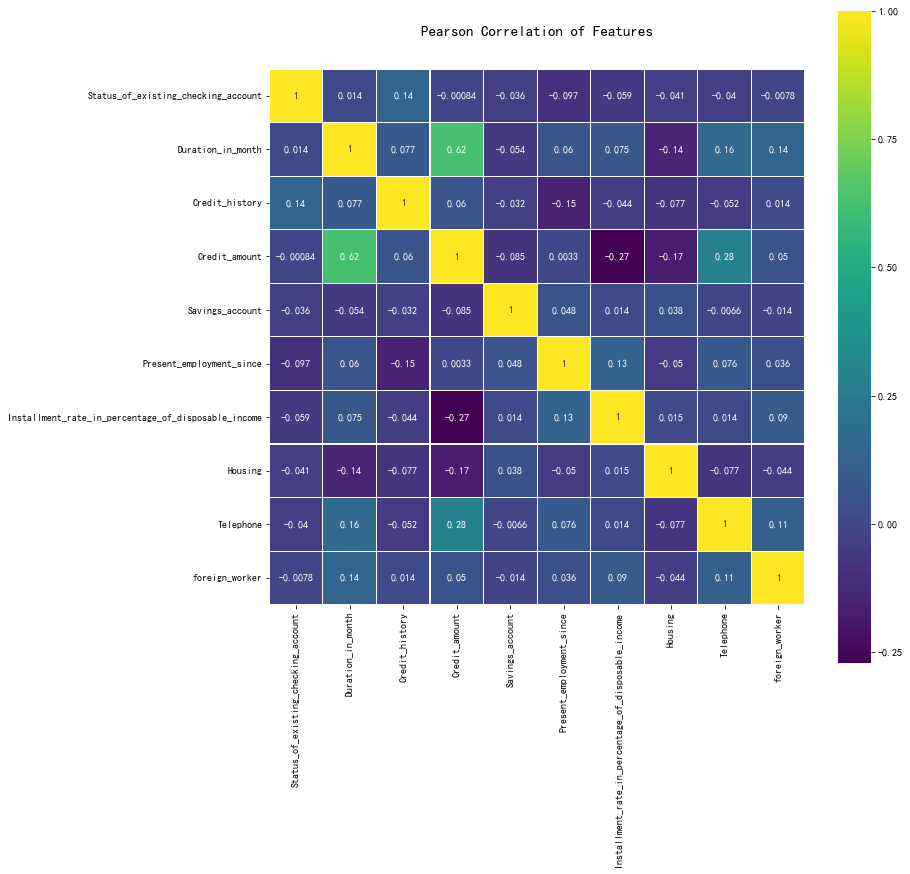

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_scale[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Embedded

In [20]:
names = data_scale.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('Status_of_existing_checking_account', 0.1094375084510419)
('Duration_in_month', 0.085310467528865688)
('Credit_history', 0.068860835170413373)
('Credit_amount', 0.11521275097639147)
('Savings_account', 0.029010466906583411)
('Present_employment_since', 0.055628848768016347)
('Installment_rate_in_percentage_of_disposable_income', 0.03808188180916855)
('guarantors', 0.024102217787252817)
('Present_residence_since', 0.032546095901067537)
('Property', 0.041687231704734304)
('Age', 0.10627991962415897)
('Housing', 0.014037357485973342)
('Number_of_existing_credits_at_this_bank', 0.02053506181011281)
('Job', 0.020856197287260809)
('Number_of_people_being_liable_to_provide_maintenance_for', 0.0098091239375144579)
('Telephone', 0.015104714199101915)
('foreign_worker', 0.0021353886222161104)
('label', 0.1061873374240139)
('saving_by_credit', 0.10517659460611228)


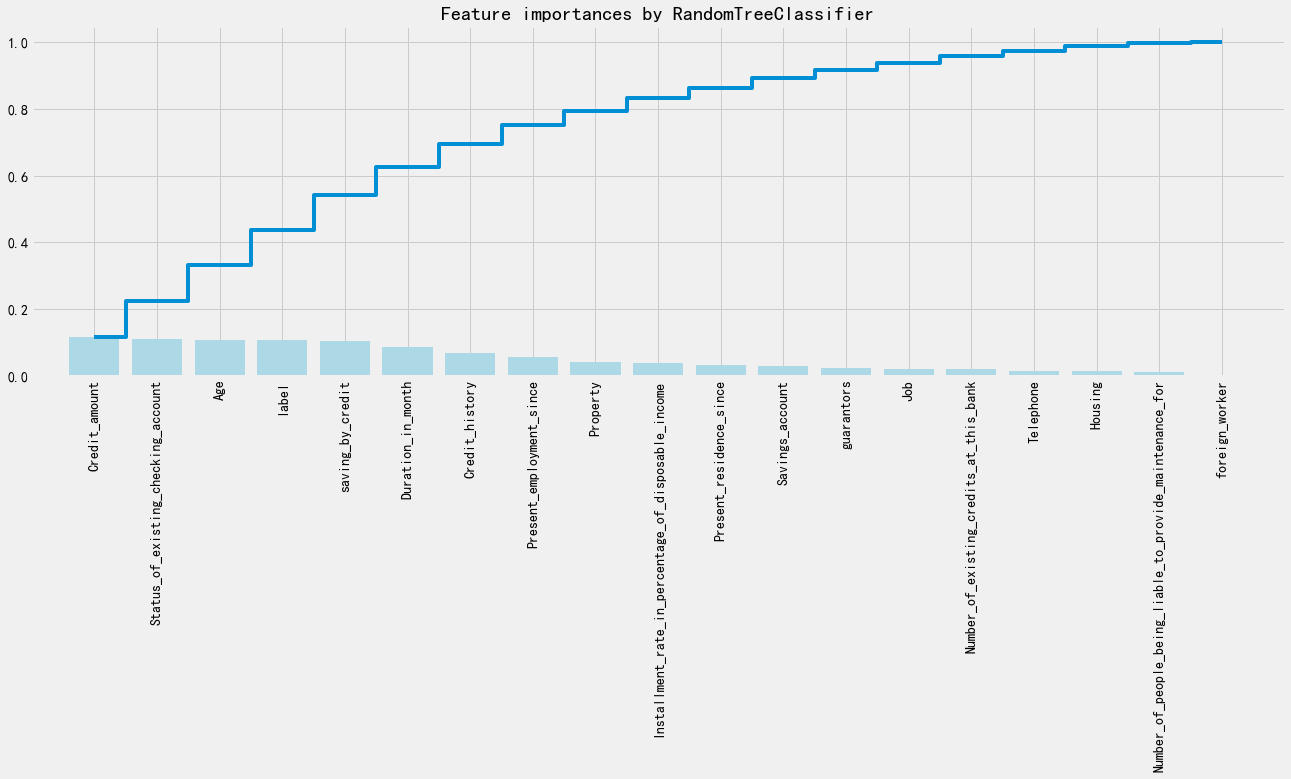

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## 过采样

In [22]:
# 构建自变量和因变量
X = data_scale.drop('label', axis=1)
y = data['label']

n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 2].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：1000; 正样本占70.00%; 负样本占0.00%
特征维数： 19


In [23]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_sample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 2].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：1400; 正样本占50.00%; 负样本占0.00%


In [24]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果

In [26]:
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.93929


In [27]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y, predicted1) 
m

array([[621,  79],
       [  6, 694]], dtype=int64)

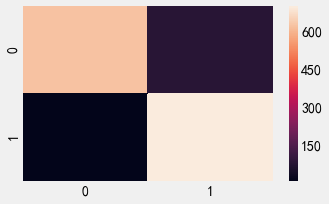

In [28]:
plt.figure(figsize=(5,3))
sns.heatmap(m) # 混淆矩阵可视化

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

             precision    recall  f1-score   support

          0       0.99      0.89      0.94       700
          1       0.90      0.99      0.94       700

avg / total       0.94      0.94      0.94      1400



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.939286


## cross-validation+grid search

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样
# 构建参数组合
param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),  param_grid, cv=10) # 确定模型LogisticRegression，和参数组合param_grid ，cv指定5折
grid_search.fit(X_train, y_train) # 使用训练集学习算法

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [32]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)

In [33]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.70918


In [34]:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001403,0.000398,0.605102,0.606471,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",12,0.585859,0.603859,...,0.628866,0.608154,0.587629,0.599094,0.670103,0.595696,0.000489,0.000488,0.047932,0.019982
1,0.002002,0.000400,0.703061,0.716666,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",10,0.676768,0.724177,...,0.649485,0.725934,0.690722,0.727067,0.762887,0.711212,0.000775,0.000490,0.030972,0.006485
2,0.001901,0.000100,0.702041,0.717573,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",11,0.676768,0.720772,...,0.628866,0.727067,0.701031,0.723669,0.773196,0.715742,0.000539,0.000300,0.042786,0.006538
3,0.003104,0.000100,0.708163,0.723128,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",6,0.676768,0.719637,...,0.670103,0.729332,0.680412,0.729332,0.783505,0.716874,0.000535,0.000300,0.036504,0.005104
4,0.013809,0.000501,0.709184,0.724263,1,l1,"{'C': 1, 'penalty': 'l1'}",1,0.676768,0.723042,...,0.670103,0.724802,0.690722,0.731597,0.793814,0.714609,0.003432,0.000501,0.039045,0.005520
5,0.003202,0.000300,0.707143,0.723244,1,l2,"{'C': 1, 'penalty': 'l2'}",8,0.676768,0.725312,...,0.649485,0.723669,0.690722,0.729332,0.793814,0.713477,0.000400,0.000459,0.040887,0.004856
6,0.020714,0.000300,0.707143,0.721769,10,l1,"{'C': 10, 'penalty': 'l1'}",8,0.676768,0.725312,...,0.649485,0.724802,0.701031,0.729332,0.783505,0.712344,0.005201,0.000458,0.038502,0.005422
7,0.004103,0.000600,0.708163,0.721769,10,l2,"{'C': 10, 'penalty': 'l2'}",6,0.676768,0.724177,...,0.649485,0.724802,0.701031,0.729332,0.783505,0.712344,0.000831,0.000490,0.037811,0.005412
8,0.022515,0.000100,0.709184,0.721655,100,l1,"{'C': 100, 'penalty': 'l1'}",1,0.676768,0.724177,...,0.649485,0.724802,0.711340,0.729332,0.783505,0.713477,0.006937,0.000300,0.037744,0.005156
9,0.003502,0.000400,0.709184,0.721541,100,l2,"{'C': 100, 'penalty': 'l2'}",1,0.676768,0.723042,...,0.649485,0.724802,0.711340,0.729332,0.783505,0.713477,0.000672,0.000490,0.037744,0.005112


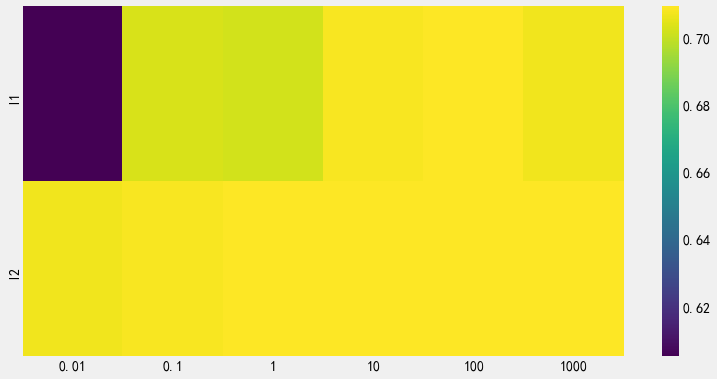

In [35]:
scores = np.array(results.mean_test_score).reshape(2, 6)
sns.heatmap(scores,  yticklabels=param_grid['penalty'], xticklabels=param_grid['C'], cmap="viridis")

In [36]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))#grid_search.best_estimator_ 返回模型以及他的所有参数（包含最优参数）

Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [37]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.71429


In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73       215
          1       0.72      0.68      0.70       205

avg / total       0.71      0.71      0.71       420



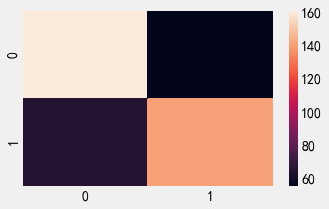

In [39]:
m2 = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(5,3))
sns.heatmap(m2) # 混淆矩阵可视化

### 数据划分

In [40]:
#X_train , X_test, y_train,  y_test = train_test_split(X_scale, y, test_size=0.2)

## 使用最邻近算法

### cross-validation

In [41]:
#from sklearn.model_selection import cross_val_score
#lda = LinearDiscriminantAnalysis()
#scores = cross_val_score(lda, X_train, y_train, cv=10)
#scores

### 网格搜索

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pre_lda = lda.predict(X_test)
y_pre_dtc = dtc.predict(X_test)
y_pre_gnb = gnb.predict(X_test)
y_pre_knn = knn.predict(X_test)
y_pre_lg = lg.predict(X_test)

In [43]:
y_preds =  dict(LDA=y_pre_lda, DecisionTree=y_pre_dtc, GaussianNB=y_pre_gnb, KNN=y_pre_knn, LogisticRegression=y_pre_lg)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
for name, y_pred in y_preds.items():
    print(name,'准确度:\t', accuracy_score(y_test, y_pred))
    print(name,'准确率:\t', precision_score(y_test, y_pred))
    print(name,'召回率:\t', recall_score(y_test, y_pred))
    print()

LDA 准确度:	 0.716666666667
LDA 准确率:	 0.719387755102
LDA 召回率:	 0.687804878049

DecisionTree 准确度:	 0.766666666667
DecisionTree 准确率:	 0.755980861244
DecisionTree 召回率:	 0.770731707317

GaussianNB 准确度:	 0.671428571429
GaussianNB 准确率:	 0.744525547445
GaussianNB 召回率:	 0.49756097561

KNN 准确度:	 0.72380952381
KNN 准确率:	 0.798657718121
KNN 召回率:	 0.580487804878

LogisticRegression 准确度:	 0.714285714286
LogisticRegression 准确率:	 0.717948717949
LogisticRegression 召回率:	 0.682926829268



In [44]:
for name, y_pred in y_preds.items():
    print(name, classification_report(y_test, y_pred))
    print('\n\n')

LDA              precision    recall  f1-score   support

          0       0.71      0.74      0.73       215
          1       0.72      0.69      0.70       205

avg / total       0.72      0.72      0.72       420




DecisionTree              precision    recall  f1-score   support

          0       0.78      0.76      0.77       215
          1       0.76      0.77      0.76       205

avg / total       0.77      0.77      0.77       420




GaussianNB              precision    recall  f1-score   support

          0       0.64      0.84      0.72       215
          1       0.74      0.50      0.60       205

avg / total       0.69      0.67      0.66       420




KNN              precision    recall  f1-score   support

          0       0.68      0.86      0.76       215
          1       0.80      0.58      0.67       205

avg / total       0.74      0.72      0.72       420




LogisticRegression              precision    recall  f1-score   support

          0       0.71 

In [45]:
from sklearn.metrics import confusion_matrix
from plot_comfusion_matrix import *

Normalized confusion matrix
[[ 0.74418605  0.25581395]
 [ 0.31219512  0.68780488]]


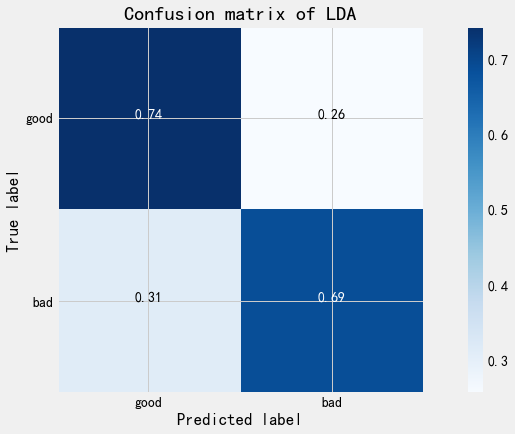




Normalized confusion matrix
[[ 0.7627907   0.2372093 ]
 [ 0.22926829  0.77073171]]


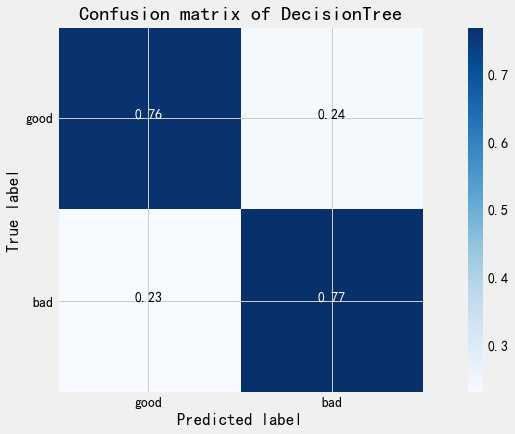




Normalized confusion matrix
[[ 0.8372093   0.1627907 ]
 [ 0.50243902  0.49756098]]


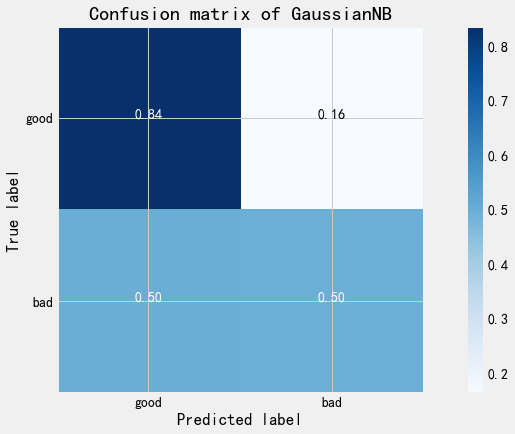




Normalized confusion matrix
[[ 0.86046512  0.13953488]
 [ 0.4195122   0.5804878 ]]


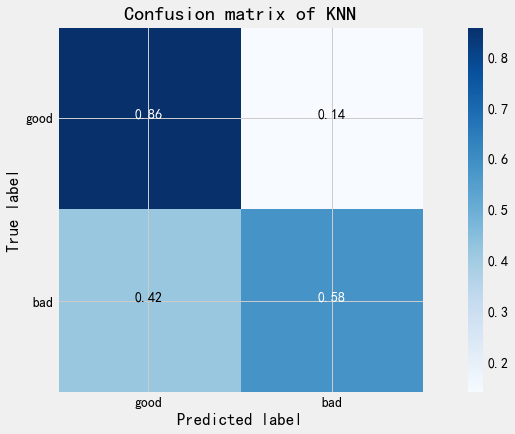




Normalized confusion matrix
[[ 0.74418605  0.25581395]
 [ 0.31707317  0.68292683]]


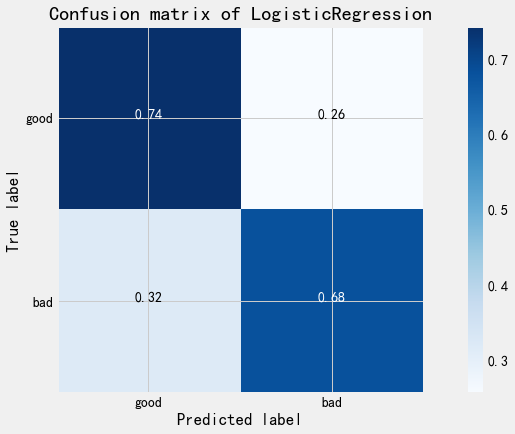

In [46]:
y_preds =  dict(LDA=y_pre_lda, DecisionTree=y_pre_dtc, GaussianNB=y_pre_gnb, KNN=y_pre_knn, LogisticRegression=y_pre_lg)
classs = ['good', 'bad']
for name,y_pred in y_preds.items():
    cm = confusion_matrix(y_test, y_pred)    
    plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of {}'.format(name))
    plt.show()
    print('\n\n')

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1,20))
weight_options = ['uniform', 'distance']
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_knn = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm)
#rand_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')
rand_knn = RandomizedSearchCV(knn, param_knn, cv=10, scoring='accuracy',n_iter=10, random_state=5)
rand_knn.fit(X_train, y_train)
print("knn_best:%f" %rand_knn.best_score_)

knn_best:0.780612


In [48]:
y_knn_pred = rand_knn.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

accuracy: 0.804761904762
             precision    recall  f1-score   support

          0       0.75      0.94      0.83       215
          1       0.91      0.66      0.77       205

avg / total       0.83      0.80      0.80       420



In [50]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y_test, y_knn_pred)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.801475


Normalized confusion matrix
[[ 0.93953488  0.06046512]
 [ 0.33658537  0.66341463]]


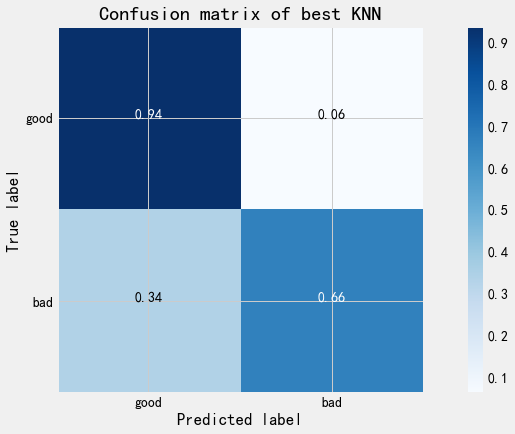

In [49]:
cm = confusion_matrix(y_test, y_knn_pred)    
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best KNN')